In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/powerlifting-data/powerlifting_dataset.csv


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/kaggle/input/powerlifting-data/powerlifting_dataset.csv')

# Display the first few rows of the dataset
df.head()

,Lifter Name,Age,Weight Class,Lift Type,Amount Lifted (kg)
0,Jessica Wilson,46,59 kg,Bench Press,269
1,John Doe,60,83 kg,Bench Press,179
2,Emily Davis,41,105 kg,Bench Press,235
3,Emily Davis,33,66 kg,Squat,359
4,Laura Taylor,56,74 kg,Deadlift,221


In [3]:
# Display basic information about the dataset
df.info()

# Display summary statistics
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Lifter Name         3000 non-null   object
 1   Age                 3000 non-null   int64 
 2   Weight Class        3000 non-null   object
 3   Lift Type           3000 non-null   object
 4   Amount Lifted (kg)  3000 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 117.3+ KB


,Lifter Name,Age,Weight Class,Lift Type,Amount Lifted (kg)
count,3000,3000.000000,3000,3000,3000.000000
unique,10,NaN,9,3,NaN
top,Emily Davis,NaN,93 kg,Deadlift,NaN
freq,333,NaN,359,1025,NaN
mean,NaN,41.064000,NaN,NaN,250.332667
std,NaN,13.682628,NaN,NaN,86.281208
min,NaN,18.000000,NaN,NaN,100.000000
25%,NaN,29.000000,NaN,NaN,176.750000
50%,NaN,41.000000,NaN,NaN,250.000000
75%,NaN,53.000000,NaN,NaN,325.250000


In [4]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

# Display percentage of missing values
missing_percentage = (missing_values / len(df)) * 100
print("\nPercentage of missing values in each column:")
print(missing_percentage)

Missing values in each column:
Lifter Name           0
Age                   0
Weight Class          0
Lift Type             0
Amount Lifted (kg)    0
dtype: int64

Percentage of missing values in each column:
Lifter Name           0.0
Age                   0.0
Weight Class          0.0
Lift Type             0.0
Amount Lifted (kg)    0.0
dtype: float64


In [5]:
# Display data types of each column
print("Data types of each column:")
print(df.dtypes)

# Convert columns to appropriate types if needed
# For example, ensure that 'Amount Lifted (kg)' is a numeric type
df['Amount Lifted (kg)'] = pd.to_numeric(df['Amount Lifted (kg)'], errors='coerce')

Data types of each column:
Lifter Name           object
Age                    int64
Weight Class          object
Lift Type             object
Amount Lifted (kg)     int64
dtype: object


In [6]:
# Calculate basic statistics for 'Amount Lifted (kg)'
print("Basic statistics for 'Amount Lifted (kg)':")
print(df['Amount Lifted (kg)'].describe())

Basic statistics for 'Amount Lifted (kg)':
count    3000.000000
mean      250.332667
std        86.281208
min       100.000000
25%       176.750000
50%       250.000000
75%       325.250000
max       399.000000
Name: Amount Lifted (kg), dtype: float64


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


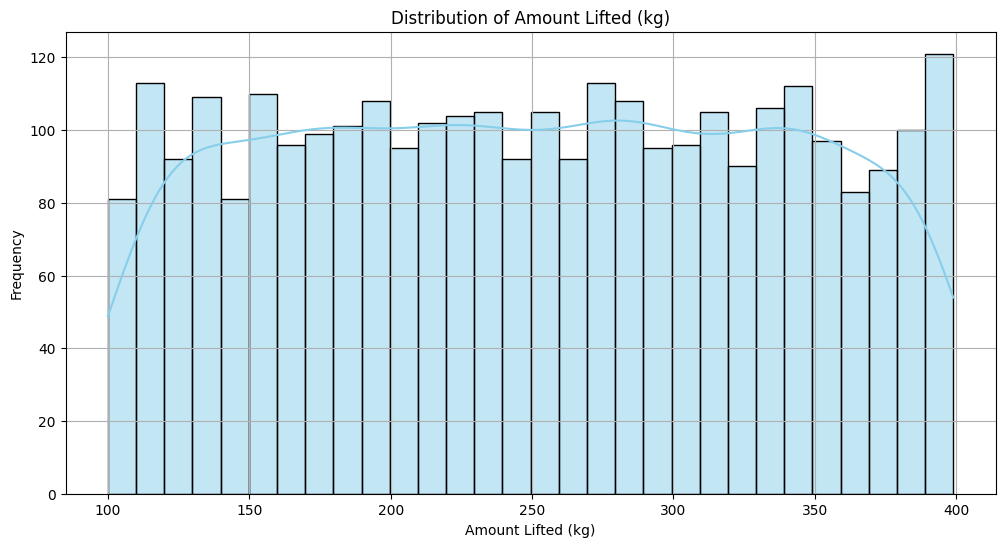

In [7]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Amount Lifted (kg)'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Amount Lifted (kg)')
plt.xlabel('Amount Lifted (kg)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


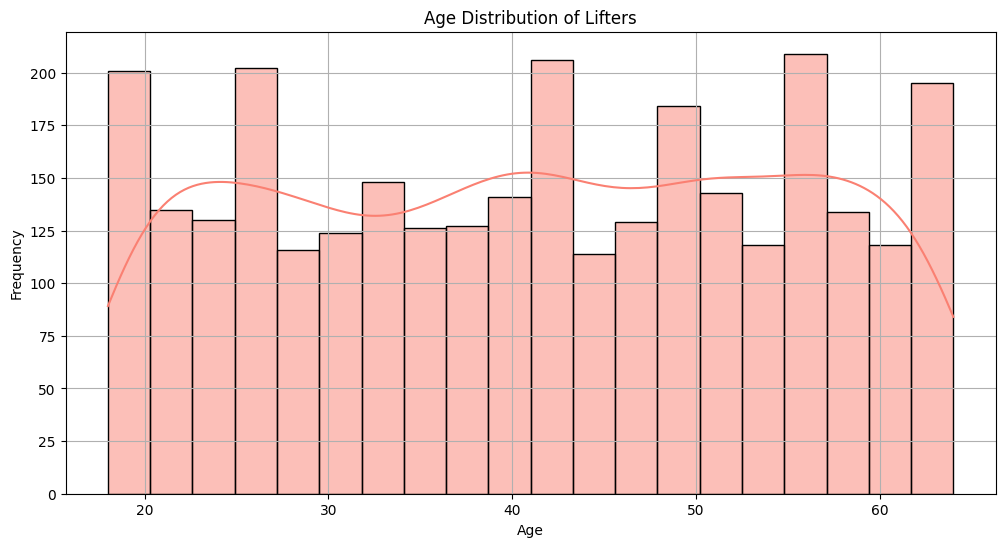

In [8]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Age'], bins=20, kde=True, color='salmon')
plt.title('Age Distribution of Lifters')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

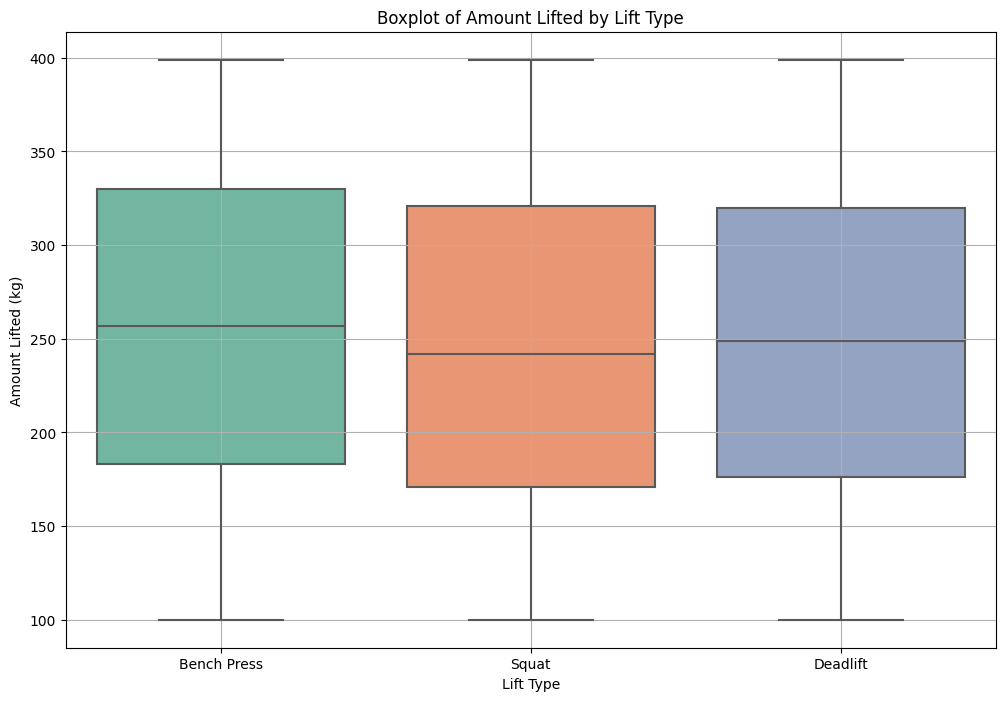

In [9]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Lift Type', y='Amount Lifted (kg)', data=df, palette='Set2')
plt.title('Boxplot of Amount Lifted by Lift Type')
plt.xlabel('Lift Type')
plt.ylabel('Amount Lifted (kg)')
plt.grid(True)
plt.show()

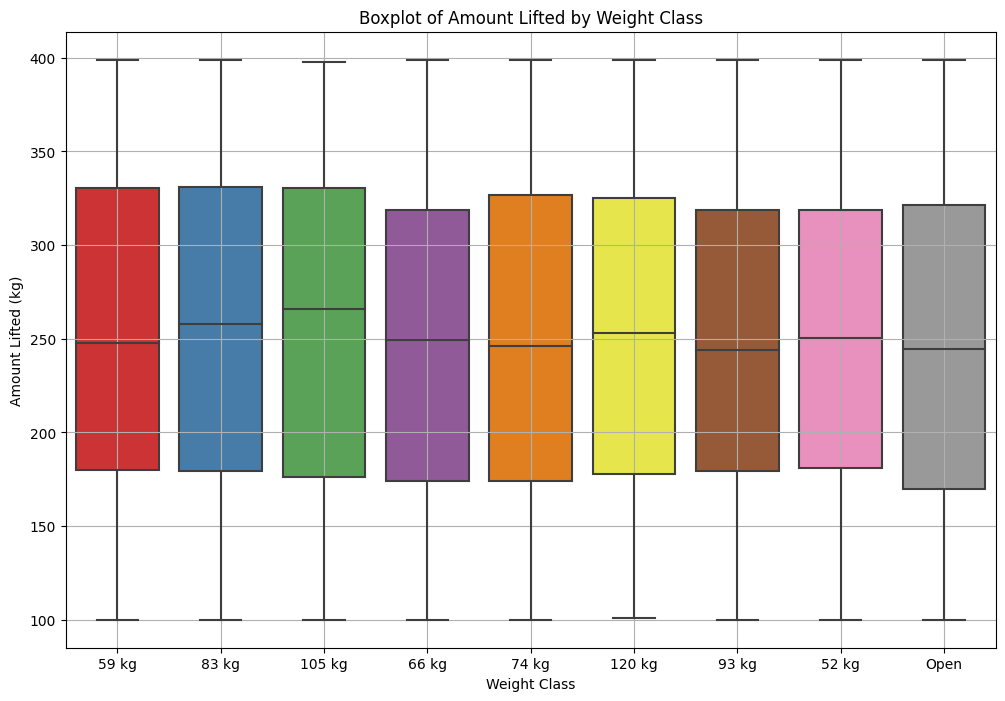

In [10]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Weight Class', y='Amount Lifted (kg)', data=df, palette='Set1')
plt.title('Boxplot of Amount Lifted by Weight Class')
plt.xlabel('Weight Class')
plt.ylabel('Amount Lifted (kg)')
plt.grid(True)
plt.show()

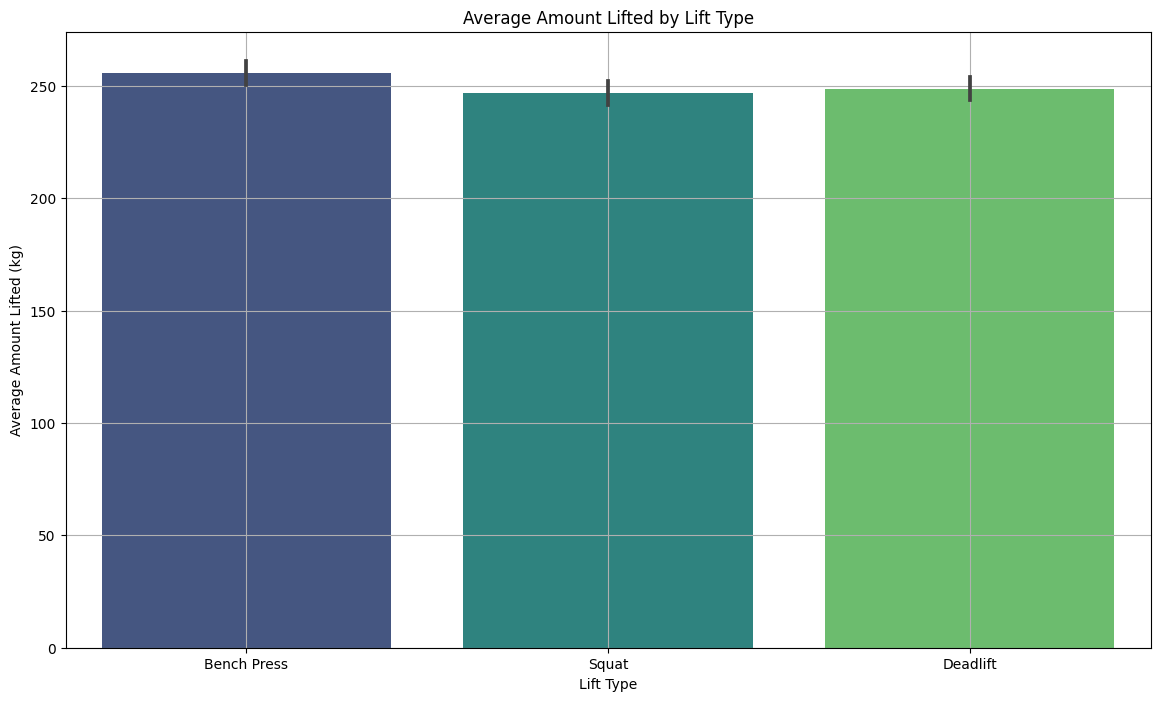

In [11]:
plt.figure(figsize=(14, 8))
sns.barplot(x='Lift Type', y='Amount Lifted (kg)', data=df, estimator='mean', palette='viridis')
plt.title('Average Amount Lifted by Lift Type')
plt.xlabel('Lift Type')
plt.ylabel('Average Amount Lifted (kg)')
plt.grid(True)
plt.show()

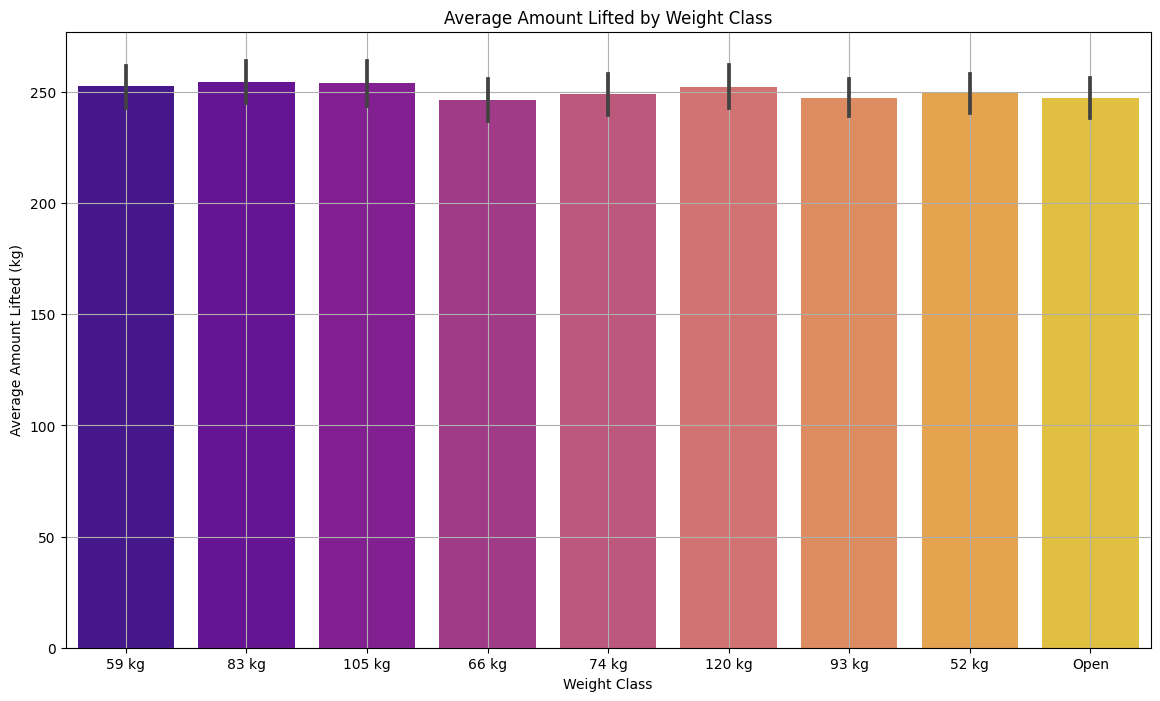

In [12]:
plt.figure(figsize=(14, 8))
sns.barplot(x='Weight Class', y='Amount Lifted (kg)', data=df, estimator='mean', palette='plasma')
plt.title('Average Amount Lifted by Weight Class')
plt.xlabel('Weight Class')
plt.ylabel('Average Amount Lifted (kg)')
plt.grid(True)
plt.show()

Extended correlation matrix:
                         Age  Amount Lifted (kg)
Age                 1.000000           -0.013701
Amount Lifted (kg) -0.013701            1.000000


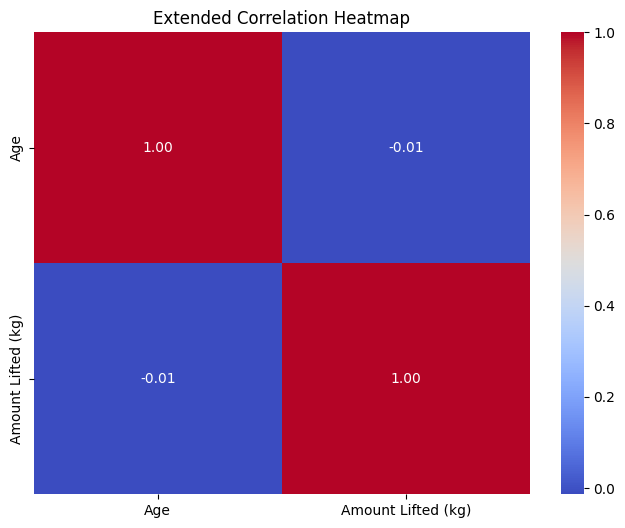

In [13]:
# Check correlation matrix including all numerical columns
correlation_matrix_extended = df[['Age', 'Amount Lifted (kg)']].corr()
print("Extended correlation matrix:")
print(correlation_matrix_extended)

# Plot the extended correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_extended, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Extended Correlation Heatmap')
plt.show()

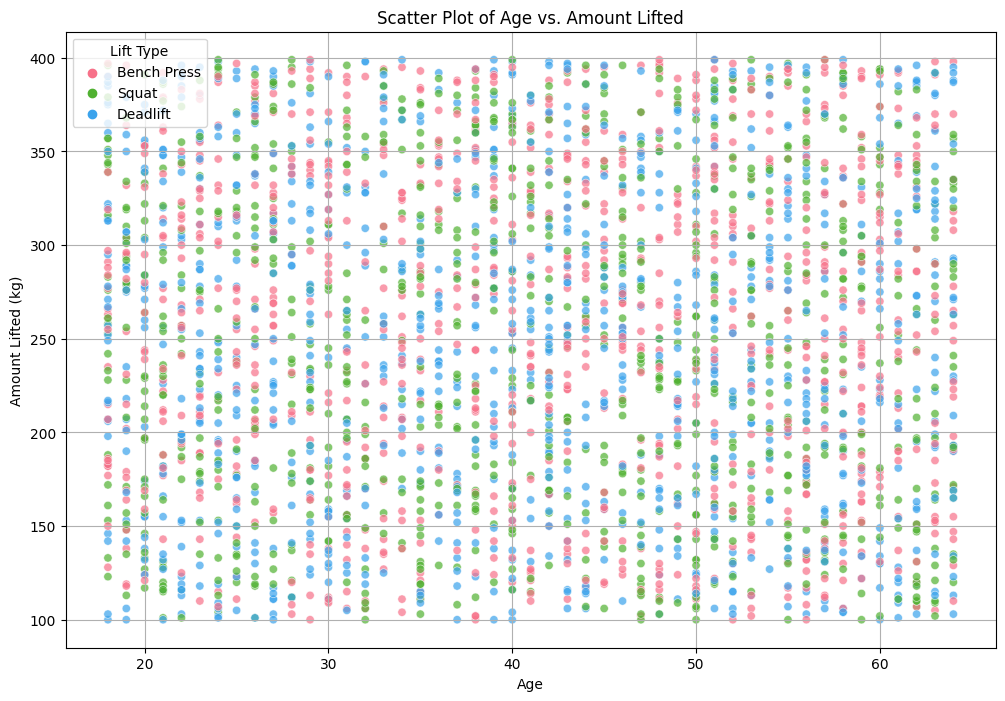

In [14]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Age', y='Amount Lifted (kg)', hue='Lift Type', data=df, palette='husl', alpha=0.7)
plt.title('Scatter Plot of Age vs. Amount Lifted')
plt.xlabel('Age')
plt.ylabel('Amount Lifted (kg)')
plt.legend(title='Lift Type')
plt.grid(True)
plt.show()

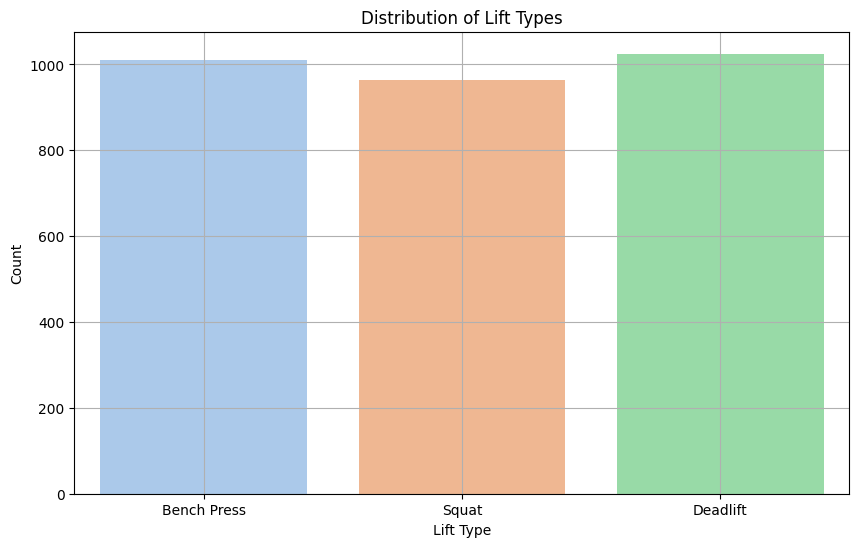

In [15]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Lift Type', data=df, palette='pastel')
plt.title('Distribution of Lift Types')
plt.xlabel('Lift Type')
plt.ylabel('Count')
plt.grid(True)
plt.show()

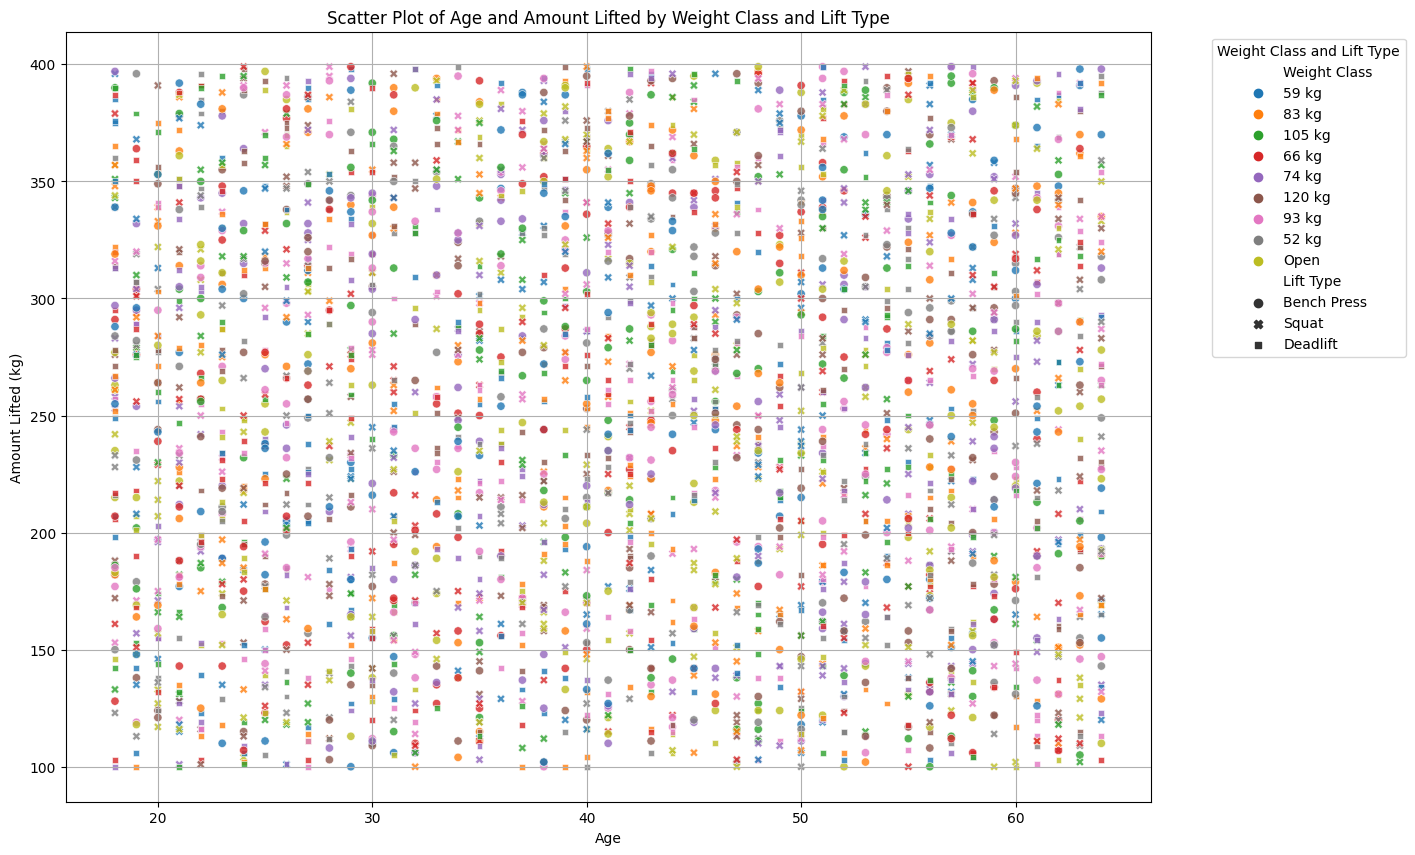

In [16]:
plt.figure(figsize=(14, 10))
sns.scatterplot(x='Age', y='Amount Lifted (kg)', hue='Weight Class', style='Lift Type', data=df, palette='tab10', alpha=0.8)
plt.title('Scatter Plot of Age and Amount Lifted by Weight Class and Lift Type')
plt.xlabel('Age')
plt.ylabel('Amount Lifted (kg)')
plt.legend(title='Weight Class and Lift Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()